In [1]:
from pycaret.datasets import get_data
import joblib as jb
import pandas as pd

In [2]:
df = pd.DataFrame(jb.load('01AEDAdataV1.bin'))

In [3]:
df = df.dropna()
df.shape

(56935, 83)

In [4]:
data = df.sample(frac=0.95, random_state=786)
data_unseen = df.drop(data.index).reset_index(drop=True)
data.reset_index(drop=True, inplace=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (54088, 83)
Unseen Data For Predictions: (2847, 83)


_______________________________

In [5]:
from pycaret.classification import *

In [6]:
exp_clf101 = setup(data = data, target = 'hospital_death')

,Description,Value
0,Session id,7324
1,Target,hospital_death
2,Target type,Binary
3,Original data shape,"(54088, 83)"
4,Transformed data shape,"(54088, 120)"
5,Transformed train set shape,"(37861, 120)"
6,Transformed test set shape,"(16227, 120)"
7,Numeric features,61
8,Categorical features,7
9,Preprocess,True


In [7]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9262,0.0000,0.2894,0.6680,0.4037,0.3709,0.4082,0.7240
gbc,Gradient Boosting Classifier,0.9261,0.8759,0.2748,0.6790,0.3909,0.3590,0.4013,2.2760
rf,Random Forest Classifier,0.9249,0.0000,0.2246,0.7060,0.3405,0.3118,0.3705,0.6840
et,Extra Trees Classifier,0.9237,0.0000,0.1809,0.7401,0.2904,0.2655,0.3414,0.6460
xgboost,Extreme Gradient Boosting,0.9231,0.0000,0.2946,0.6150,0.3978,0.3622,0.3907,1.4630
ada,Ada Boost Classifier,0.9228,0.8701,0.2919,0.6135,0.3949,0.3593,0.3880,0.7960
ridge,Ridge Classifier,0.9221,0.8601,0.1507,0.7471,0.2503,0.2279,0.3126,0.2870
lda,Linear Discriminant Analysis,0.9180,0.8602,0.3628,0.5395,0.4332,0.3909,0.4001,0.3720
lr,Logistic Regression,0.9168,0.7975,0.1036,0.6167,0.1767,0.1557,0.2279,3.7240
dummy,Dummy Classifier,0.9136,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2610


In [8]:
print(best_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=7324, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


In [9]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [10]:
dt = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9232,0.0000,0.2713,0.6312,0.3795,0.3454,0.3808
1,0.9268,0.0000,0.2905,0.6786,0.4069,0.3745,0.4131
2,0.9282,0.0000,0.3119,0.6846,0.4286,0.3959,0.4310
3,0.9308,0.0000,0.3333,0.7124,0.4542,0.4224,0.4574
4,0.9205,0.0000,0.2446,0.5970,0.3471,0.3126,0.3482
5,0.9250,0.0000,0.2752,0.6569,0.3879,0.3550,0.3936
6,0.9237,0.0000,0.2599,0.6439,0.3704,0.3375,0.3773
7,0.9274,0.0000,0.2997,0.6806,0.4161,0.3836,0.4206
8,0.9329,0.0000,0.3242,0.7626,0.4549,0.4253,0.4700


In [11]:
print(dt)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=7324, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


In [12]:
tuned_dt = tune_model(dt)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:30:42
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9229,0.0000,0.2713,0.6268,0.3787,0.3444,0.3790
1,0.9268,0.0000,0.3028,0.6689,0.4168,0.3837,0.4183
2,0.9276,0.0000,0.3211,0.6688,0.4339,0.4003,0.4312
3,0.9276,0.0000,0.3180,0.6710,0.4315,0.3981,0.4300
4,0.9160,0.0000,0.2538,0.5287,0.3430,0.3040,0.3275
5,0.9253,0.0000,0.3058,0.6410,0.4141,0.3795,0.4093
6,0.9258,0.0000,0.2966,0.6554,0.4084,0.3748,0.4086
7,0.9229,0.0000,0.2936,0.6115,0.3967,0.3609,0.3888
8,0.9292,0.0000,0.3272,0.6903,0.4440,0.4113,0.4442


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [13]:
print(dt)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=7324, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


In [14]:
print(tuned_dt)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=7324, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


_________________

#### AUC Plot

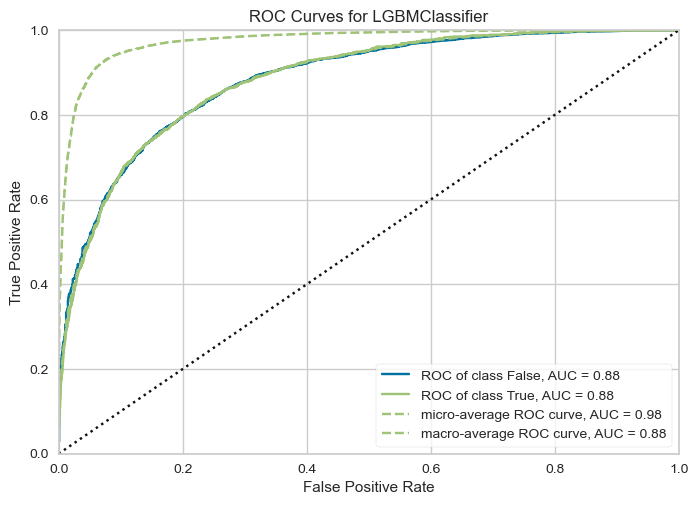

In [15]:
plot_model(tuned_dt, plot = 'auc')

#### Precision-Recall Curve

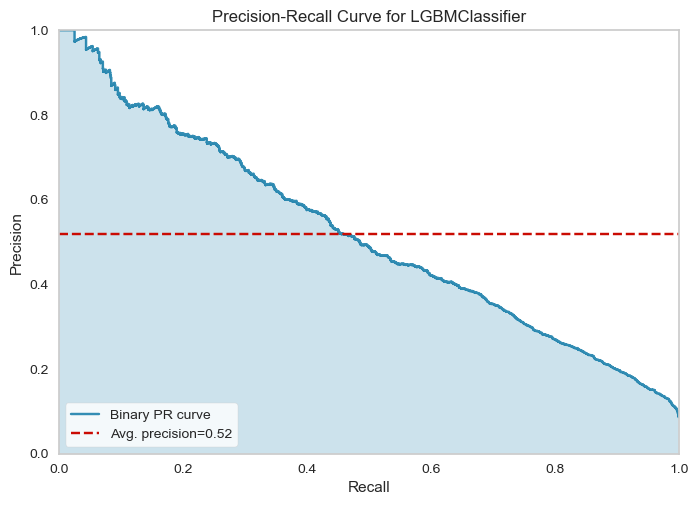

In [16]:
plot_model(tuned_dt, plot = 'pr')

#### Feature Importance Plot

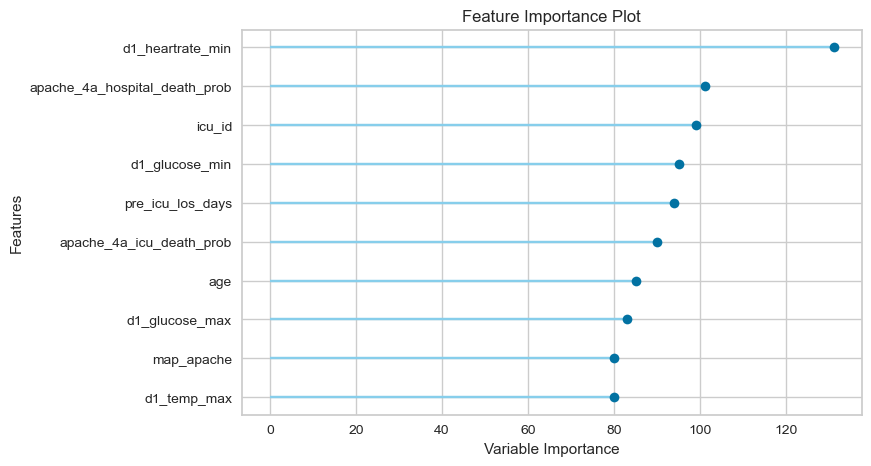

In [17]:
plot_model(tuned_dt, plot='feature')

#### Confusion Matrix

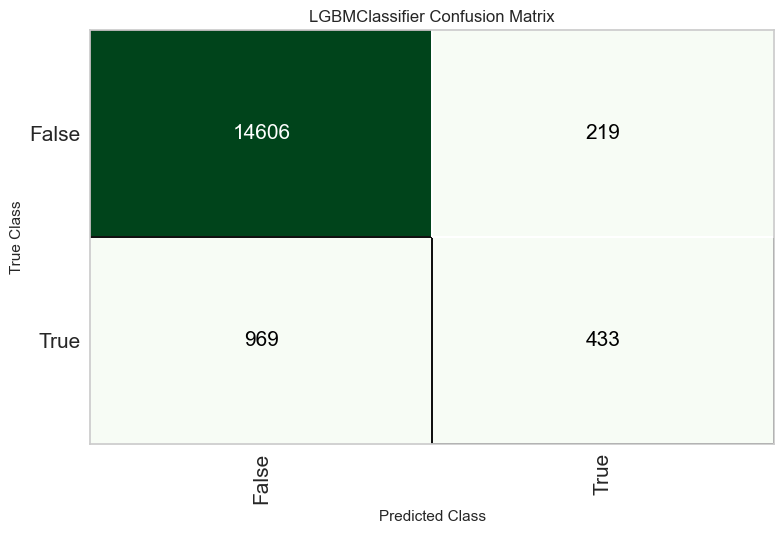

In [18]:
plot_model(tuned_dt, plot = 'confusion_matrix')

In [19]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Predict on test

In [20]:
predict_model(tuned_dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9268,0.8836,0.3088,0.6641,0.4216,0.3881,0.4207


,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,...,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death,prediction_label,prediction_score
3947,102100,13,76,32.127688,False,Caucasian,F,163.8,Accident & Emergency,694,...,False,False,False,False,False,Cardiovascular,Cardiovascular,False,0,0.9972
30721,51653,104,77,25.738917,False,Caucasian,M,167.6,Floor,926,...,False,False,False,False,False,Gastrointestinal,Gastrointestinal,False,0,0.9873
23090,95536,176,75,25.495969,False,Caucasian,M,177.8,Accident & Emergency,622,...,False,False,False,False,False,Cardiovascular,Cardiovascular,False,0,0.9872
41890,24727,116,54,59.211953,False,African American,F,165.1,Floor,307,...,False,False,False,False,False,Respiratory,Respiratory,False,0,0.9059
12459,125793,181,81,20.48597,False,Caucasian,M,172.7,Accident & Emergency,814,...,False,False,False,False,False,Sepsis,Cardiovascular,True,1,0.6821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44934,47151,64,48,39.873042,False,Caucasian,F,179.1,Floor,683,...,False,False,False,False,False,Cardiovascular,Cardiovascular,False,0,0.9964
5436,9483,161,70,29.258848,False,Caucasian,F,167.0,Other Hospital,413,...,False,False,False,False,False,Sepsis,Cardiovascular,False,0,0.7045
28742,37345,196,83,28.050683,True,Caucasian,M,175.3,Operating Room / Recovery,772,...,False,False,False,False,False,Gastrointestinal,Gastrointestinal,False,0,0.8925
29380,31384,32,53,22.210744,False,Caucasian,M,176.0,Floor,369,...,False,False,False,False,False,Metabolic,Metabolic,False,0,0.9962


### Finalize Model

In [21]:
final_dt = finalize_model(tuned_dt)

In [22]:
print(final_dt)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['encounter_id', 'hospital_id',
                                             'age', 'bmi', 'height', 'icu_id',
                                             'pre_icu_los_days', 'weight',
                                             'apache_2_diagnosis',
                                             'apache_3j_diagnosis',
                                             'gcs_eyes_apache',
                                             'gcs_motor_apache',
                                             'gcs_verbal_apache',
                                             'heart_rate_apache', 'map_apache',
                                             'resprate_apache', 'temp...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
        

In [23]:
predict_model(final_dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9452,0.9565,0.4337,0.8649,0.5777,0.5518,0.5896


,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,...,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death,prediction_label,prediction_score
3947,102100,13,76,32.127688,False,Caucasian,F,163.8,Accident & Emergency,694,...,False,False,False,False,False,Cardiovascular,Cardiovascular,False,0,0.9958
30721,51653,104,77,25.738917,False,Caucasian,M,167.6,Floor,926,...,False,False,False,False,False,Gastrointestinal,Gastrointestinal,False,0,0.9874
23090,95536,176,75,25.495969,False,Caucasian,M,177.8,Accident & Emergency,622,...,False,False,False,False,False,Cardiovascular,Cardiovascular,False,0,0.9927
41890,24727,116,54,59.211953,False,African American,F,165.1,Floor,307,...,False,False,False,False,False,Respiratory,Respiratory,False,0,0.8728
12459,125793,181,81,20.48597,False,Caucasian,M,172.7,Accident & Emergency,814,...,False,False,False,False,False,Sepsis,Cardiovascular,True,1,0.6959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44934,47151,64,48,39.873042,False,Caucasian,F,179.1,Floor,683,...,False,False,False,False,False,Cardiovascular,Cardiovascular,False,0,0.9959
5436,9483,161,70,29.258848,False,Caucasian,F,167.0,Other Hospital,413,...,False,False,False,False,False,Sepsis,Cardiovascular,False,0,0.7095
28742,37345,196,83,28.050683,True,Caucasian,M,175.3,Operating Room / Recovery,772,...,False,False,False,False,False,Gastrointestinal,Gastrointestinal,False,0,0.9015
29380,31384,32,53,22.210744,False,Caucasian,M,176.0,Floor,369,...,False,False,False,False,False,Metabolic,Metabolic,False,0,0.9947


In [24]:
unseen_predictions = predict_model(final_dt, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9438,0.9035,0.3963,0.7478,0.5181,0.4912,0.5193


,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,...,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death,prediction_label,prediction_score
0,48056,118,65,28.408929,False,Hispanic,M,167.6,Accident & Emergency,100,...,False,False,False,False,False,Neurological,Neurologic,False,0,0.9947
1,129675,77,76,32.374349,False,Caucasian,M,182.9,Floor,113,...,False,True,False,False,False,Cardiovascular,Cardiovascular,False,0,0.9924
2,52821,118,25,46.40625,True,Caucasian,F,160.0,Operating Room / Recovery,100,...,False,False,False,False,False,Neurological,Neurologic,False,0,0.9916
3,42646,118,33,24.386111,False,Caucasian,F,167.6,Floor,89,...,False,False,False,False,True,Neurological,Neurologic,False,0,0.9943
4,60738,118,84,29.186193,False,Caucasian,F,157.5,Floor,92,...,False,False,False,False,False,Gastrointestinal,Gastrointestinal,False,0,0.9594


### Predict on unseen data

In [35]:
from pycaret.utils.generic import check_metric
check_metric(unseen_predictions['hospital_death'], unseen_predictions['prediction_label'], metric = 'Precision')

0.7478

### Saving/Loading Model

In [37]:
save_model(final_dt,'./FinalModel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['encounter_id', 'hospital_id',
                                              'age', 'bmi', 'height', 'icu_id',
                                              'pre_icu_los_days', 'weight',
                                              'apache_2_diagnosis',
                                              'apache_3j_diagnosis',
                                              'gcs_eyes_apache',
                                              'gcs_motor_apache',
                                              'gcs_verbal_apache',
                                              'heart_rate_apache', 'map_apache',
                                              'resprate_apache', 'temp...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='s

______________________________

In [38]:
from pycaret.classification import *

In [40]:
saved_final_rf = load_model('./FinalModel')

Transformation Pipeline and Model Successfully Loaded


In [41]:
new_prediction = predict_model(saved_final_rf, data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9438,0.9035,0.3963,0.7478,0.5181,0.4912,0.5193


In [43]:
new_prediction['prediction_label']

0       0
1       0
2       0
3       0
4       0
       ..
2842    0
2843    0
2844    0
2845    0
2846    0
Name: prediction_label, Length: 2847, dtype: int32

In [44]:
new_prediction['prediction_score']

0       0.9947
1       0.9924
2       0.9916
3       0.9943
4       0.9594
         ...  
2842    0.9963
2843    0.9958
2844    0.9892
2845    0.9955
2846    0.7466
Name: prediction_score, Length: 2847, dtype: float64

________________________________

In [45]:
new_prediction.head()

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,...,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death,prediction_label,prediction_score
0,48056,118,65,28.408929,False,Hispanic,M,167.6,Accident & Emergency,100,...,False,False,False,False,False,Neurological,Neurologic,False,0,0.9947
1,129675,77,76,32.374349,False,Caucasian,M,182.9,Floor,113,...,False,True,False,False,False,Cardiovascular,Cardiovascular,False,0,0.9924
2,52821,118,25,46.40625,True,Caucasian,F,160.0,Operating Room / Recovery,100,...,False,False,False,False,False,Neurological,Neurologic,False,0,0.9916
3,42646,118,33,24.386111,False,Caucasian,F,167.6,Floor,89,...,False,False,False,False,True,Neurological,Neurologic,False,0,0.9943
4,60738,118,84,29.186193,False,Caucasian,F,157.5,Floor,92,...,False,False,False,False,False,Gastrointestinal,Gastrointestinal,False,0,0.9594


#### results of unseen_predictions and new_prediction are identical

In [46]:
from pycaret.utils.generic import check_metric
check_metric(new_prediction['hospital_death'], new_prediction['prediction_label'], metric = 'Precision')

0.7478

__________________________

________________________